<a href="https://colab.research.google.com/github/Bborub/bk-bridge-pedestrian/blob/main/Stox2(2)_27Aug23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


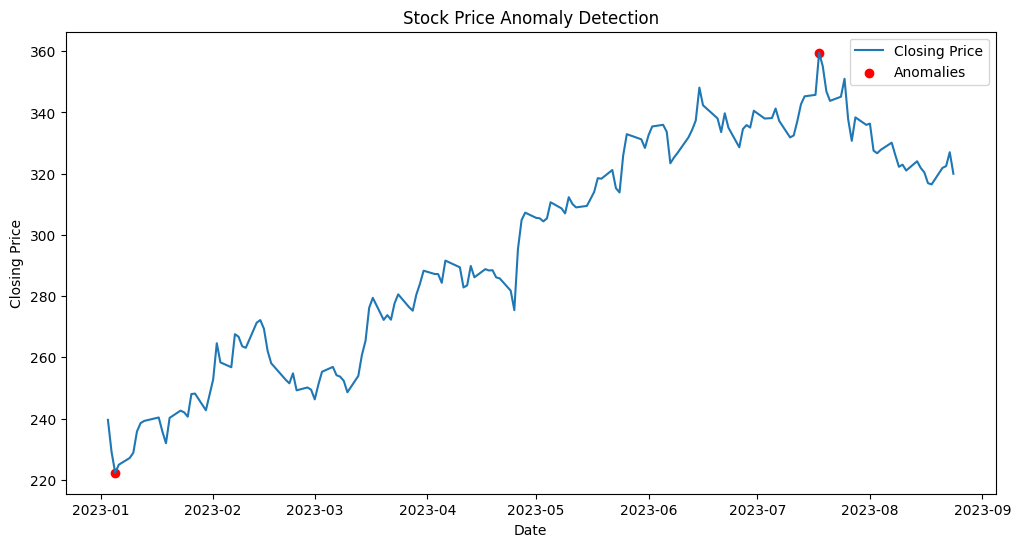

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Download stock price data
start = "2023-01-01"
end = "2023-08-25"
data = yf.download("MSFT", start=start, end=end)

# Preprocess the data
df = data[["Close"]]  # Select the relevant feature(s), such as the closing price
df = df.dropna()  # Remove any missing values

# Train the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Set the contamination parameter (anomaly threshold)
model.fit(df)

# Predict anomalies
# df["anomaly_score"] = model.decision_function(df)
# df["anomaly_label"] = model.predict(df)

...

# Train the Isolation Forest model
# model = IsolationForest(contamination=0.01)  # Set the contamination parameter (anomaly threshold)
# model.fit(df)

# Predict anomalies
df["anomaly_score"] = model.decision_function(df)
df["anomaly_label"] = model.predict(df[df.columns[:-1]])  # Exclude the anomaly_score column

...

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price")
anomalies = df[df["anomaly_label"] == -1]
plt.scatter(anomalies.index, anomalies["Close"], color="red", label="Anomalies")
plt.title("Stock Price Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


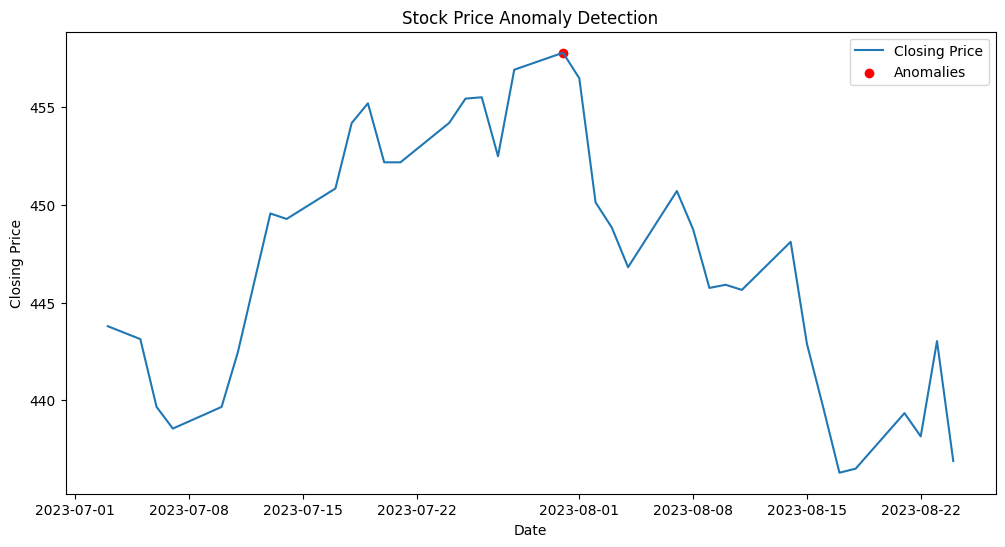

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Download stock price data
start = "2023-07-01"
end = "2023-08-25"
data = yf.download("SPY", start=start, end=end)

# Preprocess the data
df = data[["Close"]]  # Select the relevant feature(s), such as the closing price
df = df.dropna()  # Remove any missing values

# Train the Isolation Forest model
model = IsolationForest(contamination=0.01)  # Set the contamination parameter (anomaly threshold)
model.fit(df)

# Predict anomalies
df["anomaly_score"] = model.decision_function(df)
df["anomaly_label"] = model.predict(df[df.columns[:-1]])  # Exclude the anomaly_score column

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price")
anomalies = df[df["anomaly_label"] == -1]
plt.scatter(anomalies.index, anomalies["Close"], color="red", label="Anomalies")
plt.title("Stock Price Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Load the stock price data
start = "2020-01-01"
end = "2023-08-25"
data = yf.download("SPY", start, end)

# Calculate the rolling mean and standard deviation
window = 20  # Adjust this window size as per your preference
rolling_mean = data["Close"].rolling(window).mean()
rolling_std = data["Close"].rolling(window).std()

# Calculate the z-scores for each data point
z_scores = (data["Close"] - rolling_mean) / rolling_std

# Define a threshold for anomaly detection
threshold = 2.5  # Adjust this threshold as per your preference

# Find the anomalies
anomalies = data[np.abs(z_scores) > threshold]

# Print the anomalies
print(anomalies)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
start = "2020-01-01"
end = "2023-08-25"
data = yf.download("SPY", start, end)

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
data["Close"] = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

[*********************100%%**********************]  1 of 1 completed


In [ ]:
window_size = 10
input_data = []
labels = []

for i in range(len(data) - window_size):
    input_data.append(data["Close"].values[i:i+window_size])
    labels.append(data["Close"].values[i+window_size])

input_data = np.array(input_data)
labels = np.array(labels)

In [ ]:
split = int(0.8 * len(input_data))

train_data = input_data[:split]
train_labels = labels[:split]
test_data = input_data[split:]
test_labels = labels[split:]

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [ ]:
history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_data=(test_data, test_labels))

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Load the stock price data
start = "2020-01-01"
end = "2023-08-25"
data = yf.download("SPY", start, end)

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
data["Close"] = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

# Create input sequences for the CNN
window_size = 10
input_data = []
labels = []

for i in range(len(data) - window_size):
    input_data.append(data["Close"].values[i:i+window_size])
    labels.append(data["Close"].values[i+window_size])

input_data = np.array(input_data)
labels = np.array(labels)

# Split the data into training and testing sets
split = int(0.8 * len(input_data))

train_data = input_data[:split]
train_labels = labels[:split]
test_data = input_data[split:]
test_labels = labels[split:]

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

# Train the CNN model
history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_data=(test_data, test_labels))

# Generate predictions
train_predictions = model.predict(train_data)
test_predictions = model.predict(test_data)

# Scale back the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
train_labels = scaler.inverse_transform(train_labels.reshape(-1, 1))
test_labels = scaler.inverse_transform(test_labels.reshape(-1, 1))

# Calculate the residuals
train_residuals = train_labels - train_predictions
test_residuals = test_labels - test_predictions

# Plot the stock price anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index[window_size:split], train_residuals, label="Training Anomalies")
plt.plot(data.index[split+window_size:], test_residuals, label="Testing Anomalies")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Anomaly")
plt.title("Stock Price Anomalies")
plt.legend()
plt.show()

In [ ]:
# Load the stock price data
start = "2020-01-01"
end = "2023-08-25"
data = yf.download("SPY", start, end)

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
data["Close"] = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

# Create input sequences for the CNN
window_size = 10
input_data = []
labels = []

for i in range(len(data) - window_size):
    input_data.append(data["Close"].values[i:i+window_size])
    labels.append(data["Close"].values[i+window_size])

input_data = np.array(input_data)
labels = np.array(labels)

# Split the data into training and testing sets
split = int(0.8 * len(input_data))

train_data = input_data[:split]
train_labels = labels[:split]
test_data = input_data[split:]
test_labels = labels[split:]

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

# Train the CNN model
history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_data=(test_data, test_labels))

# Generate predictions
train_predictions = model.predict(train_data)
test_predictions = model.predict(test_data)

# Scale back the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
train_labels = scaler.inverse_transform(train_labels.reshape(-1, 1))
test_labels = scaler.inverse_transform(test_labels.reshape(-1, 1))

# Calculate the residuals
train_residuals = train_labels - train_predictions
test_residuals = test_labels - test_predictions

# Plot the stock price anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index[window_size:split+window_size], train_residuals, label="Training Anomalies")
plt.plot(data.index[split+window_size:], test_residuals, label="Testing Anomalies")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Anomaly")
plt.title("Stock Price Anomalies")
plt.legend()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock price data
start = "2020-01-01"
end = "2023-08-25"
data = yf.download("SPY", start, end)

# Calculate rolling average and standard deviation
window_size = 20
rolling_mean = data['Close'].rolling(window_size).mean()
rolling_std = data['Close'].rolling(window_size).std()

# Calculate Z-scores
z_scores = (data['Close'] - rolling_mean) / rolling_std

# Plotting the stock price anomalies
plt.figure(figsize=(12, 8))

# Plot the actual stock prices
plt.plot(data.index, data['Close'], label='Actual Prices', color='blue')

# Plot the rolling mean and upper/lower bands
plt.plot(data.index, rolling_mean, label='Rolling Mean', color='orange')
plt.fill_between(data.index, rolling_mean - rolling_std, rolling_mean + rolling_std, alpha=0.2, color='orange')

# Plot the Z-scores
plt.plot(data.index, z_scores, label='Z-Scores', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Anomalies')
plt.legend()

# Show the plot
plt.show()

[*********************100%%**********************]  1 of 1 completed


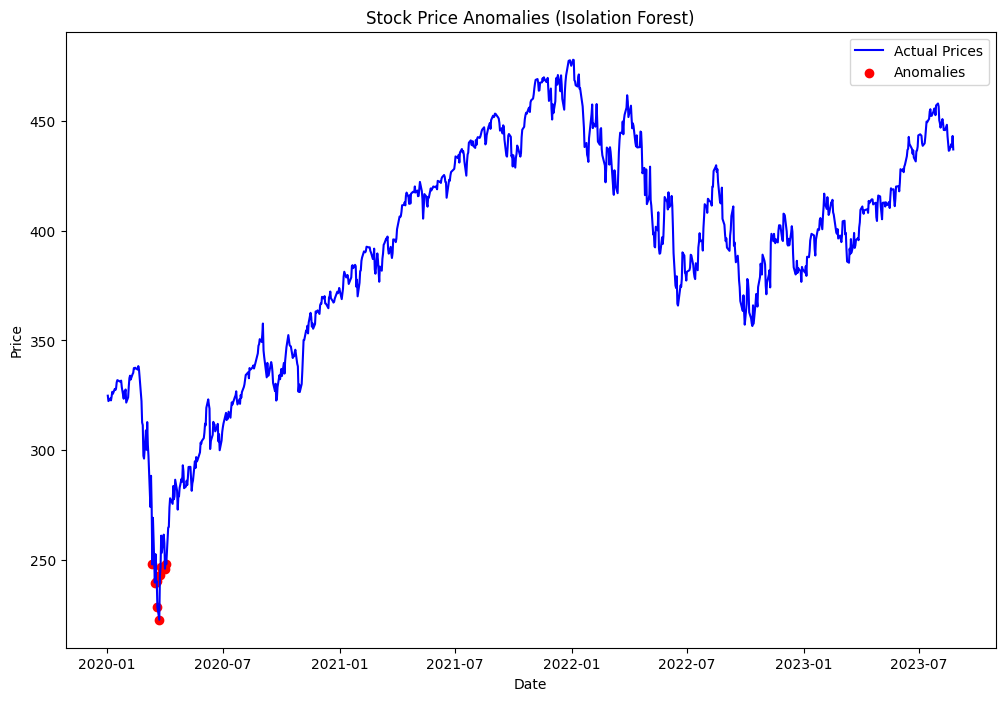

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the stock price data
start = "2020-01-01"
end = "2023-08-25"
data = yf.download("SPY", start, end)

# Extract the closing prices
prices = data['Close'].values.reshape(-1, 1)

# Apply Isolation Forest
clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(prices)
anomaly_scores = clf.decision_function(prices)
anomaly_labels = clf.predict(prices)

# Plotting the stock price anomalies
plt.figure(figsize=(12, 8))

# Plot the actual stock prices
plt.plot(data.index, prices, label='Actual Prices', color='blue')

# Highlight the anomalies
anomaly_indices = np.where(anomaly_labels == -1)[0]
anomaly_prices = prices[anomaly_indices]
plt.scatter(data.index[anomaly_indices], anomaly_prices, color='red', marker='o', label='Anomalies')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Anomalies (Isolation Forest)')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load the stock price data
start = "2020-01-01"
end = "2023-08-25"
data = yf.download("SPY", start, end)

# Extract the closing prices
prices = data['Close'].values.reshape(-1, 1)

# Apply Local Outlier Factor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outlier_scores = clf.negative_outlier_factor_
outlier_labels = clf.fit_predict(prices)

# Plotting the stock price anomalies
plt.figure(figsize=(12, 8))

# Plot the actual stock prices
plt.plot(data.index, prices, label='Actual Prices', color='blue')

# Highlight the anomalies
anomaly_indices = np.where(outlier_labels == -1)[0]
anomaly_prices = prices[anomaly_indices]
plt.scatter(data.index[anomaly_indices], anomaly_prices, color='red', marker='o', label='Anomalies')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Anomalies (Local Outlier Factor)')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load the stock price data
start = "2020-01-01"
end = "2023-08-25"
data = yf.download("SPY", start, end)

# Extract the closing prices
prices = data['Close'].values.reshape(-1, 1)

# Apply Local Outlier Factor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outlier_scores = clf.negative_outlier_factor_
outlier_labels = clf.fit_predict(prices)

# Plotting the stock price anomalies
plt.figure(figsize=(12, 8))

# Plot the actual stock prices
plt.plot(data.index, prices, label='Actual Prices', color='blue')

# Highlight the anomalies
anomaly_indices = np.where(outlier_labels == -1)[0]
anomaly_prices = prices[anomaly_indices]
plt.scatter(data.index[anomaly_indices], anomaly_prices, color='red', marker='o', label='Anomalies')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Anomalies (Local Outlier Factor)')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load the stock price data
start = "2020-01-01"
end = "2023-08-25"
data = yf.download("SPY", start, end)

# Extract the closing prices
prices = data['Close'].values.reshape(-1, 1)

# Apply Local Outlier Factor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outlier_scores = clf.fit_predict(prices)
anomaly_scores = clf.negative_outlier_factor_

# Plotting the stock price anomalies
plt.figure(figsize=(12, 8))

# Plot the actual stock prices
plt.plot(data.index, prices, label='Actual Prices', color='blue')

# Highlight the anomalies
anomaly_indices = np.where(outlier_scores == -1)[0]
anomaly_prices = prices[anomaly_indices]
plt.scatter(data.index[anomaly_indices], anomaly_prices, color='red', marker='o', label='Anomalies')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Anomalies (Local Outlier Factor)')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the stock price data
start = "2023-07-01"
end = "2023-08-25"
data = yf.download("AMD", start, end)

# Extract the closing prices
prices = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Define the number of previous time steps to consider
lookback = 20

# Prepare the training data
X_train = []
y_train = []
for i in range(lookback, len(scaled_prices)):
    X_train.append(scaled_prices[i-lookback:i, 0])
    y_train.append(scaled_prices[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the training data
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)

# Calculate the residuals (prediction errors)
residuals = prices[lookback:] - train_predictions

# Plotting the stock price anomalies
plt.figure(figsize=(12, 8))

# Plot the actual stock prices
plt.plot(data.index[lookback:], prices[lookback:], label='Actual Prices', color='blue')

# Highlight the anomalies
anomaly_indices = np.where(np.abs(residuals) > np.std(residuals)*3)[0]
anomaly_prices = prices[lookback:][anomaly_indices]
plt.scatter(data.index[lookback:][anomaly_indices], anomaly_prices, color='red', marker='o', label='Anomalies')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Anomalies (LSTM)')
plt.legend()

# Show the plot
plt.show()

[*********************100%%**********************]  5 of 5 completed
Epoch 1/50
2/2 [==============================] - 4s 37ms/step - loss: 0.4123
Epoch 2/50
2/2 [==============================] - 0s 38ms/step - loss: 0.2867
Epoch 3/50
2/2 [==============================] - 0s 38ms/step - loss: 0.1901
Epoch 4/50
2/2 [==============================] - 0s 41ms/step - loss: 0.1093
Epoch 5/50
2/2 [==============================] - 0s 31ms/step - loss: 0.0577
Epoch 6/50
2/2 [==============================] - 0s 38ms/step - loss: 0.0441
Epoch 7/50
2/2 [==============================] - 0s 42ms/step - loss: 0.0510
Epoch 8/50
2/2 [==============================] - 0s 41ms/step - loss: 0.0490
Epoch 9/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0402
Epoch 10/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0353
Epoch 11/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0350
Epoch 12/50
2/2 [==============================] - 0s 37ms/step - loss:

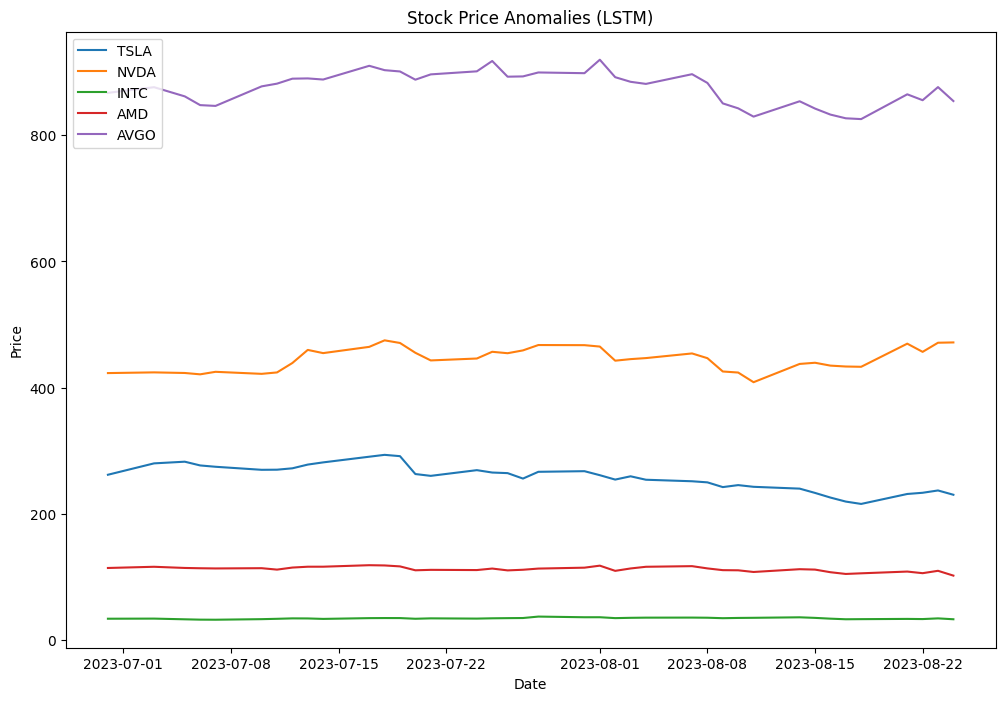

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the stocks to analyze
stocks = ['TSLA', 'NVDA', 'INTC', 'AMD', 'AVGO']

# Load the stock price data
start = "2023-06-01"
end = "2023-08-25"
data = yf.download(stocks, start, end)['Close']

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the number of previous time steps to consider
lookback = 20

# Prepare the training data
X_train = []
y_train = []
for i in range(lookback, len(scaled_data)):
    X_train.append(scaled_data[i-lookback:i, :])
    y_train.append(scaled_data[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=X_train.shape[2]))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the training data
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)

# Calculate the residuals (prediction errors)
residuals = data.iloc[lookback:, :] - train_predictions

# Plotting the stock price anomalies
plt.figure(figsize=(12, 8))

# Plot the actual stock prices
for stock in stocks:
    plt.plot(data.index[lookback:], data[stock][lookback:], label=stock)

# Highlight the anomalies
anomaly_indices = np.where(np.abs(residuals) > np.std(residuals)*3)
for i, j in zip(anomaly_indices[0], anomaly_indices[1]):
    plt.scatter(data.index[lookback:][i], data.iloc[lookback:, :].values[i, j], color='red', marker='o')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Anomalies (LSTM)')
plt.legend()

# Show the plot
plt.show()